In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('ford.csv')

In [9]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [11]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [13]:
df.describe(include = ['O'])

,model,transmission,fuelType
count,17965,17965,17965
unique,23,3,5
top,Fiesta,Manual,Petrol
freq,6557,15517,12178


In [6]:
df["engineSize"]=df["engineSize"].replace(0,np.nan)
df["tax"]=df["tax"].replace(0,np.nan)

In [7]:
df.isnull().sum()

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             2153
mpg                0
engineSize        51
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.duplicated().sum()

138

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.model.value_counts()

 Fiesta                   4971
 Focus                    4039
 Kuga                     2207
 EcoSport                 1119
 C-MAX                     542
 Ka+                       519
 Mondeo                    444
 B-MAX                     311
 S-MAX                     294
 Grand C-MAX               247
 Galaxy                    227
 Edge                      205
 KA                        191
 Puma                       78
 Tourneo Custom             69
 Mustang                    57
 Grand Tourneo Connect      57
 Tourneo Connect            32
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64

In [21]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

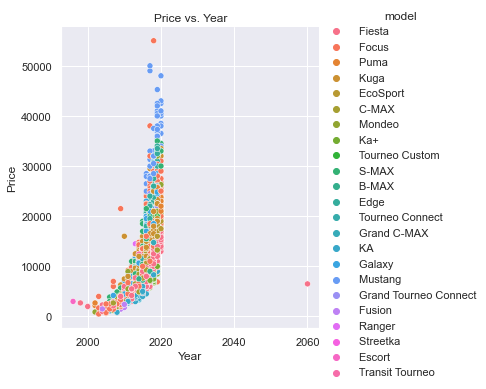

In [12]:
sns.set_theme(style="darkgrid")
sns.relplot(x="year", y="price", hue='model', data=df);

plt.title("Price vs. Year")
plt.xlabel("Year")
plt.ylabel("Price");

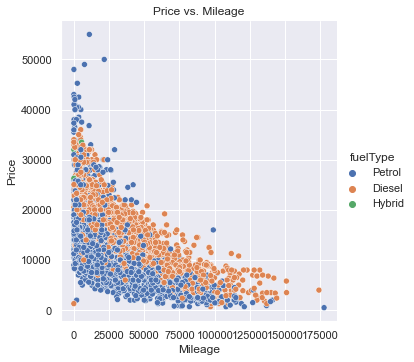

In [13]:
sns.relplot(x="mileage", y="price", hue='fuelType', data=df);
plt.title("Price vs. Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price");

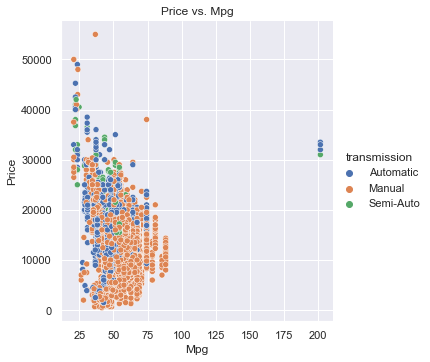

In [14]:
sns.relplot(x="mpg", y="price", data=df, hue= 'transmission');
plt.title("Price vs. Mpg")
plt.xlabel("Mpg")
plt.ylabel("Price");

/Users/aaronchacko/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/aaronchacko/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


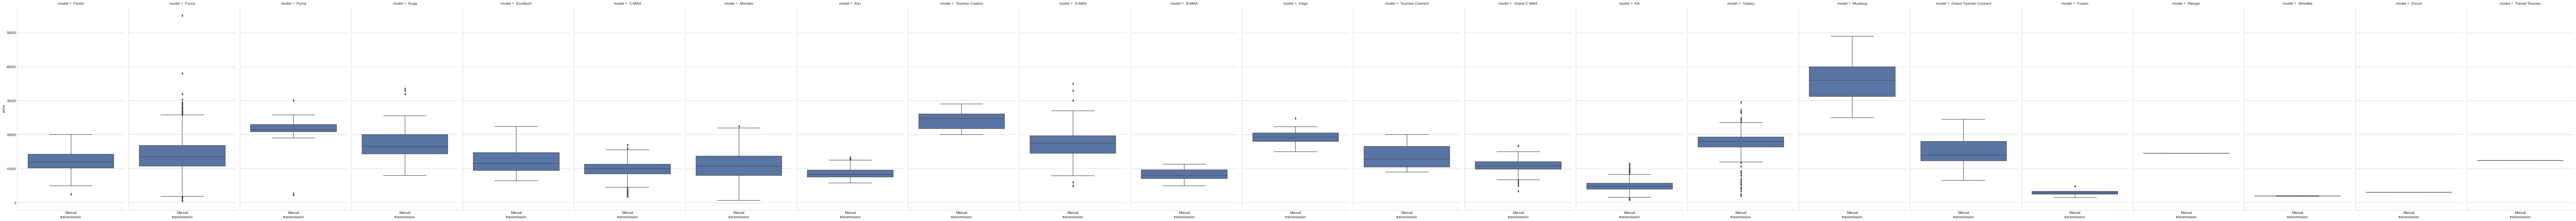

In [15]:
plt.style.use('seaborn-whitegrid')
g = sns.FacetGrid(df, col='model', size=10, aspect=0.5)
g = g.map(sns.boxplot, 'transmission', 'price')

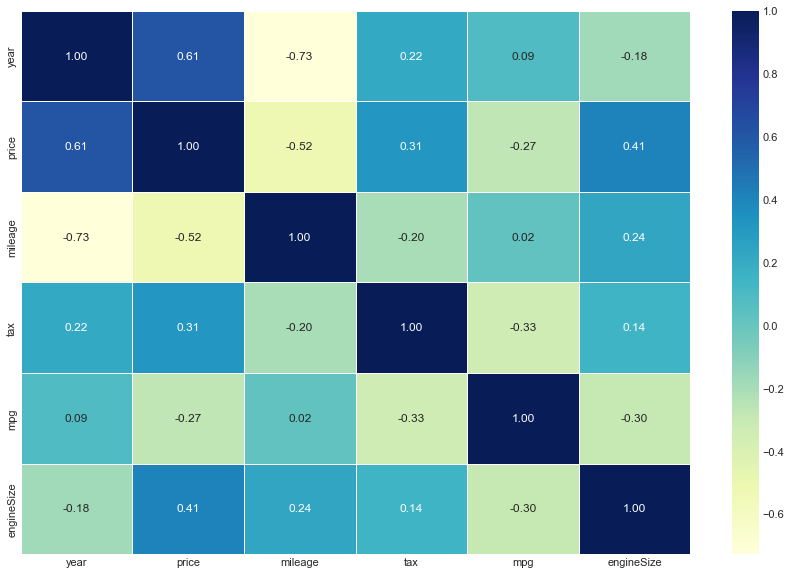

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [17]:
df = pd.get_dummies(df, columns=["model", "transmission", 'fuelType'], prefix=["model", "transmission",'fueltype'])


In [18]:
X = df.drop('price', axis=1)
y = df.price

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape

(12504, 34)

In [21]:
y_test.shape

(3126,)

In [22]:
models = {'Random Forest': RandomForestRegressor(), 'Linear Regression': linear_model.LinearRegression(), 'SVM': svm.SVR(), 'AdaBoost': AdaBoostRegressor(), 'GradientBoost': GradientBoostingRegressor()}
cv_model_mae = {}
def ml_model(models, X_train, y_train, cv):
    for name, model in models.items():
         scores = cross_val_score(model, X_train, y_train, cv=cv, scoring= 'neg_mean_absolute_error')
         mae = -(scores.mean())
         cv_model_mae[name] = mae
    return cv_model_mae
    
    

In [23]:
ml_model(models=models, X_train=X_train, y_train=y_train, cv=10)

{'Random Forest': 913.6348453993735,
 'Linear Regression': 1398.889386868064,
 'SVM': 3464.755677783783,
 'AdaBoost': 2638.109990567723,
 'GradientBoost': 1006.7935987852654}

In [24]:
n_estimators = [500, 1000]
max_depth = [50,100]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [False, True]



In [25]:
param_grid = {'n_estimators': n_estimators, 
            'max_depth': max_depth, 
            'min_samples_split': min_samples_split, 
            'min_samples_leaf': min_samples_leaf, 
            'max_features': max_features, 
            'bootstrap': bootstrap,
             }


In [26]:
rf_model = RandomForestRegressor()

In [33]:
rf_Grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, verbose=3, n_jobs=-1, scoring='r2')

In [34]:
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'max_depth': [50, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 1000]},
             scoring='r2', verbose=3)

[CV 2/5] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=-1130.145 total time= 1.3min
[CV 4/5] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000;, score=-1093.867 total time= 1.1min
[CV 1/5] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=-1027.036 total time= 1.1min
[CV 2/5] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000;, score=-1042.273 total time= 1.0min
[CV 5/5] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=-990.011 total time=  31.7s
[CV 3/5] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=-888.242 total time=   9.4s
[CV 4/5] END bootstrap=False, max_depth=50, max_f

In [35]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [36]:
score = -(rf_Grid.score(X_test, y_test))
score

-0.9350577098990882

In [37]:
rf_Grid.best_estimator_

RandomForestRegressor(max_depth=100, max_features='log2', min_samples_split=5,
                      n_estimators=1000)

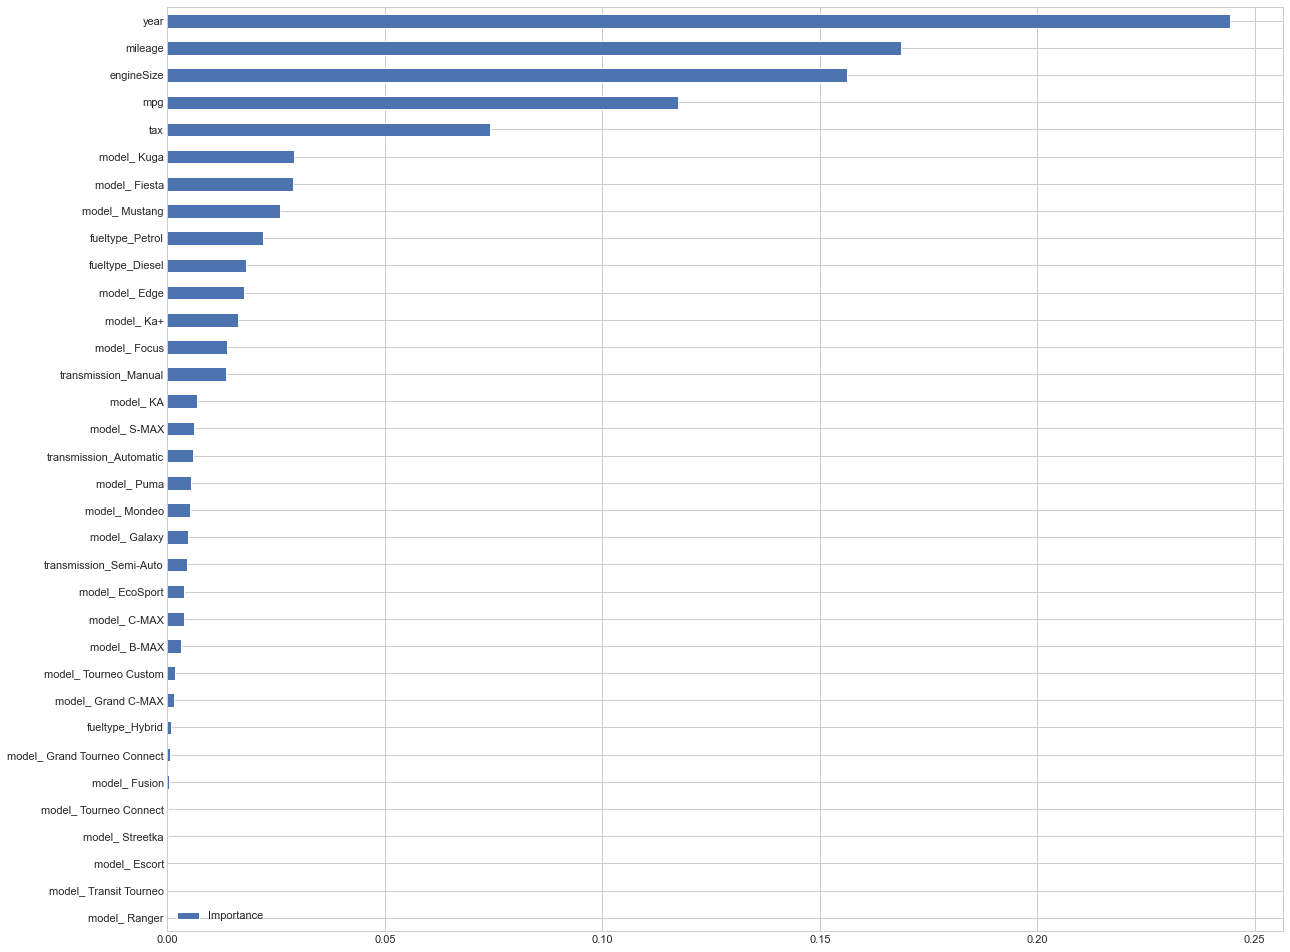

In [38]:
rf = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1000)
rf.fit(X_train, y_train)

plt.style.use('seaborn-whitegrid')
importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

In [6]:
pd.read_csv()

Object `pd.read_csv()` not found.
